In [3]:
import pandas as pd
import numpy as np
import datetime

In [113]:
import datetime
def sol(fd):
   
    def fun_hr(row):
        str=row['TIMESTAMP']
        hr=int(str[11:13])   
        return hr

    def fun_mi(row):
        str=row['TIMESTAMP']
        mi=int(str[14:16])
        return mi

    def fun_yr(row):
        str=row['TIMESTAMP']
        yr=int(str[0:4])
        return yr

    def fun_mo(row):
        str=row['TIMESTAMP']
        mo=int(str[5:7])
        return mo


    def fun_day(row):
        str=row['TIMESTAMP']
        yr=int(str[:4])
        mn=int(str[5:7])
        dy=int(str[8:10])
          #week start from monday   monday=0
            #tues=1 wed =2.... sat=5 sun=6
        x=datetime.datetime(yr,mn,dy).weekday()
        return x
    
    fd['HOUR']=fd.apply(lambda row:fun_hr(row),axis=1)
    fd['MIN']=fd.apply(lambda row:fun_mi(row),axis=1)
    fd['MONTH']=fd.apply(lambda row:fun_mo(row),axis=1)
    fd['YEAR']=fd.apply(lambda row:fun_yr(row),axis=1)
    fd['DAY']=fd.apply(lambda row:fun_day(row),axis=1)
    
    
    
    fd=fd.drop(fd[fd.STARTING_LATITUDE.isnull() & fd.DESTINATION_LATITUDE.isnull()].index)
    fd.STARTING_LATITUDE.fillna(fd.DESTINATION_LATITUDE, inplace=True)
    fd.STARTING_LONGITUDE.fillna(fd.DESTINATION_LONGITUDE, inplace=True)
    fd.DESTINATION_LATITUDE.fillna(fd.STARTING_LATITUDE, inplace=True)
    fd.DESTINATION_LONGITUDE.fillna(fd.STARTING_LONGITUDE, inplace=True)
    fd.fillna(-100, inplace=True)
    
    
    def classify_city(s_lat, s_lon):
        if abs(s_lat - 13) <= 1:
            if abs(s_lon - 80.5) <= 1:
                return 0  # delhi
            elif abs(s_lon - 77.5) <= 1:
                return 1  # banglore
        elif abs(s_lon - 72.5) <= 1:
            return 2  # chennai
        elif abs(s_lat - 25.5) <= 1:
            return 3  # lucknow
        elif abs(s_lon - 88.5) <= 1:
            return 4  # bombay
        elif abs(s_lat - 28.5) <= 1:
            return 5  # kolkata
        else:
            return None

        
    fd['CITY']=fd.apply(lambda x: classify_city(x['STARTING_LATITUDE'], x['STARTING_LONGITUDE']), axis=1)
    
   
    
    fd['VEHICLE_TYPE']=fd['VEHICLE_TYPE'].str.upper()
    fd['VEHICLE_TYPE'].fillna('NOT_GIVEN')
    
    
    print(fd.index.size)
    
    fd.reset_index(drop=True,inplace=True)
    
    #spl vehicles
    arr=[]
    for i in range(0,fd.index.size):
        if fd['VEHICLE_TYPE'][i] in ('AUTO RICKSHAW','TAXI AC','TAXI NON AC'):
            arr.append(1)
        else:
            arr.append(0)
    
    fd['SPL']=arr
    
    
    arr=[]
    for i in range(0,fd.index.size):
        if fd['VEHICLE_TYPE'][i] in ('AC BUS','TAXI AC','METRO'):
            arr.append(1)
        else:
            arr.append(0)
    
    fd['AC']=arr
    
    arr=[]

    fd=fd.fillna(-1)
    
    
    #label incoder  string to hash
    #is se hi tera chutiya kta tha ...
    # don't use this.......
    #from sklearn.preprocessing import LabelEncoder
    #fd['VEHICLE_TYPE']=fd['VEHICLE_TYPE'].apply(LabelEncoder().fit_transform)
    #fd=fd.convert_objects(convert_numeric=True)
  

    #use this to mapping
    mp=fd['VEHICLE_TYPE'].unique().tolist()
    mapping=dict(zip(mp,range(len(mp))))
    fd=fd.replace({'VEHICLE_TYPE':mapping})
    
    
    
    arr=['MIN','MONTH','YEAR','DAY']
    fd.drop(arr,inplace=True,axis=1)
    id_vec = np.array(fd.loc[:, fd.columns == 'ID'])
    
    print(id_vec)
    drp(fd)
    
    return fd


def drp(fd):
    fd.drop('STARTING_LATITUDE',axis=1,inplace=True)
    fd.drop('STARTING_LONGITUDE',axis=1,inplace=True)
    fd.drop('DESTINATION_LATITUDE',axis=1,inplace=True)
    fd.drop('DESTINATION_LONGITUDE',axis=1,inplace=True)
    fd.drop('TIMESTAMP',axis=1,inplace=True)
    fd.drop('ID',axis=1,inplace=True)
    return 



import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


data=pd.read_csv('intracity_fare_train.csv')
fd=pd.DataFrame(data=data)

fd=sol(fd)


X=fd.drop('FARE',axis=1)
y=fd['FARE']

#train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y)
 
    
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn import neural_network

reg =neural_network.MLPRegressor(shuffle=True,
                                  alpha=0.5,
                                  hidden_layer_sizes=(100, 100),
                                  max_iter=10000,
                                  random_state=100,
                                  verbose=False)

scaler=StandardScaler()
scaler.fit(X_train)

X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

reg.fit(X_train, y_train)
 
#Testing
pred=reg.predict(X_test)
    
    
from sklearn.metrics import r2_score
r2_sc=r2_score(y_test,pred)*200
#print('r2 score= '+ r2_sc)


tst=pd.read_csv('intracity_fare_test.csv')
tst=sol(tst)

f1=fd
fd_res=pd.DataFrame()
predict=reg.predict(scaler.transform(tst) )



arr=np.arange(1,len(tst)+1)


fd_res=pd.DataFrame(columns=['ID','FARE'] )

fd_res['ID']=arr
fd_res['FARE']=predict
fd_res.to_csv("answer.csv", index=False, header=True, sep=',')



19662
[[    1]
 [    2]
 [    3]
 ..., 
 [19998]
 [19999]
 [20000]]
20000
[[    1]
 [    2]
 [    3]
 ..., 
 [19998]
 [19999]
 [20000]]


In [103]:
predict

array([ -77.12211519,  -18.97412138,  130.88633444, ...,   -6.70278831,
         98.94671145,  -33.87107774])

In [105]:
fd_res['FARE']=predict.toarray.tolist()

AttributeError: 'numpy.ndarray' object has no attribute 'toarray'

In [106]:
fd_re=pd.DataFrame(columns=['ID','FARE'] )

In [107]:
fd_re

,ID,FARE


In [109]:
fd_re['ID']=arr[:,0]

In [111]:
fd_re['FARE']=predict

In [112]:
fd_re

,ID,FARE
0,1,-77.122115
1,2,-18.974121
2,3,130.886334
3,4,-43.496939
4,5,90.405104
5,6,525.175339
6,7,484.356314
7,8,18.509091
8,9,289.915407
9,10,96.582952


array([    1,     2,     3, ..., 19998, 19999, 20000])

In [94]:
arr=arr.reshape(len(tst),1)

In [71]:
arr

array([[    1],
       [    2],
       [    3],
       ..., 
       [19998],
       [19999],
       [20000]])

In [30]:
y_t=pd.read_csv('ans.csv')

In [33]:
predict.size

20000

In [34]:
arr.size

20000

In [84]:
fd_res=pd.DataFrame

In [95]:
fd_res['ID']=arr[:,0]

TypeError: 'type' object does not support item assignment

In [100]:
arr[3][0]

4

In [59]:
arr[:]

array([    0,     1,     2, ..., 19997, 19998, 19999])

In [60]:
arr=arr.reshape(20000,1)

In [62]:
arr[:,0]

array([    0,     1,     2, ..., 19997, 19998, 19999])

In [81]:
arr.dtype

dtype('int32')

In [82]:
arr=np.array(arr)

In [83]:
fd_res['ID']=arr[:,0]

TypeError: 'type' object does not support item assignment

In [76]:
arr

array([[    1],
       [    2],
       [    3],
       ..., 
       [19998],
       [19999],
       [20000]])

In [51]:
arr[:]

array([    0,     1,     2, ..., 19997, 19998, 19999])

In [46]:
arr=np.array(arr)

In [47]:
arr

array([    0,     1,     2, ..., 19997, 19998, 19999])

In [16]:
mp=fd['VEHICLE_TYPE'].unique().tolist()
mapping=dict(zip(mp,range(len(mp))))
fd=fd.replace({'VEHICLE_TYPE':mapping})

In [28]:
arr

array([    0,     1,     2, ..., 19659, 19660, 19661])

In [20]:
fd

,TIMESTAMP,STARTING_LATITUDE,STARTING_LONGITUDE,DESTINATION_LATITUDE,DESTINATION_LONGITUDE,VEHICLE_TYPE,TOTAL_LUGGAGE_WEIGHT,WAIT_TIME,TRAFFIC_STUCK_TIME,DISTANCE,FARE,HOUR,CITY,SPL,AC
0,2016-01-21 06:59:49,13.044677,80.235723,13.178228,80.163277,0,-100.0,-100.0,8,34,32.09,6,0,0,0
1,2016-06-17 22:23:30,28.639580,77.074113,28.587288,76.971306,1,7.0,9.0,66,34,985.99,22,5,1,1
2,2016-03-16 04:55:18,25.373881,82.969570,25.349656,82.992587,2,18.0,6.0,53,1,1085.33,4,3,1,0
3,2016-04-26 18:10:09,28.758384,77.011422,28.758384,77.011422,3,-100.0,-100.0,54,31,56.21,18,5,0,1
4,2016-06-22 01:51:35,22.543506,88.446273,22.706696,88.429522,0,-100.0,-100.0,33,44,30.62,1,4,0,0
5,2016-03-18 15:57:21,19.206757,72.882636,19.230355,72.838503,4,-100.0,-100.0,23,43,59.82,15,2,0,1
6,2015-11-04 16:26:53,19.012727,72.872332,19.147118,72.841727,2,22.0,0.0,61,34,586.36,16,2,1,0
7,2015-11-05 08:51:13,12.944421,77.645893,12.877228,77.694882,0,-100.0,-100.0,28,18,32.27,8,1,0,0
8,2016-08-15 14:41:00,25.304677,82.987010,25.387941,82.990020,1,12.0,18.0,69,43,1122.08,14,3,1,1
9,2015-01-23 09:36:02,22.537007,88.447269,22.578402,88.404477,3,-100.0,-100.0,17,19,23.54,9,4,0,1


In [18]:
mapping

{'AC BUS': 4,
 'AUTO RICKSHAW': 6,
 'BUS': 0,
 'METRO': 3,
 'MINI BUS': 5,
 'TAXI AC': 1,
 'TAXI NON AC': 2}

In [79]:
data

,ID,TIMESTAMP,STARTING_LATITUDE,STARTING_LONGITUDE,DESTINATION_LATITUDE,DESTINATION_LONGITUDE,VEHICLE_TYPE,TOTAL_LUGGAGE_WEIGHT,WAIT_TIME,TRAFFIC_STUCK_TIME,DISTANCE,FARE,HOUR,MIN,MONTH,YEAR,DAY
0,1,2016-01-21 06:59:49,13.044677,80.235723,13.178228,80.163277,Bus,NaN,NaN,8,34,32.09,6,59,1,2016,3
1,2,2016-06-17 22:23:30,28.639580,77.074113,28.587288,76.971306,Taxi AC,7.0,9.0,66,34,985.99,22,23,6,2016,4
2,3,2016-03-16 04:55:18,25.373881,82.969570,25.349656,82.992587,Taxi Non AC,18.0,6.0,53,1,1085.33,4,55,3,2016,2
3,4,2016-04-26 18:10:09,NaN,NaN,28.758384,77.011422,Metro,NaN,NaN,54,31,56.21,18,10,4,2016,1
4,5,2016-06-22 01:51:35,22.543506,88.446273,22.706696,88.429522,bus,NaN,NaN,33,44,30.62,1,51,6,2016,2
5,6,2016-03-18 15:57:21,19.206757,72.882636,19.230355,72.838503,AC bus,NaN,NaN,23,43,59.82,15,57,3,2016,4
6,7,2015-11-04 16:26:53,19.012727,72.872332,19.147118,72.841727,taxi Non ac,22.0,0.0,61,34,586.36,16,26,11,2015,2
7,8,2015-11-05 08:51:13,12.944421,77.645893,12.877228,77.694882,Bus,NaN,NaN,28,18,32.27,8,51,11,2015,3
8,9,2016-08-15 14:41:00,25.304677,82.987010,25.387941,82.990020,Taxi AC,12.0,18.0,69,43,1122.08,14,41,8,2016,0
9,10,2015-01-23 09:36:02,22.537007,88.447269,22.578402,88.404477,metro,NaN,NaN,17,19,23.54,9,36,1,2015,4


In [ ]:
scaler=StandardScaler()
scaler.fit(X_train)

X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

reg.fit(X_train, y_train)
 
#Testing
pred=reg.predict(X_test)
    
    
from sklearn.metrics import r2_score
r2_sc=r2_score(y_test,pred)*200
#print('r2 score= '+ r2_sc)


tst=pd.read_csv('intracity_fare_test.csv')
tst=sol(tst)

f1=fd
fd_res=pd.DataFrame()
pred_result=reg.predict(scaler.transform(tst) )

fd_res['ID']=id_vec[:,0]
fd_res['FARE']=pred_result
fd.to_csv("answer.csv", index=False, header=True, sep='\n')


In [37]:
fd

,ID,TIMESTAMP,STARTING_LATITUDE,STARTING_LONGITUDE,DESTINATION_LATITUDE,DESTINATION_LONGITUDE,VEHICLE_TYPE,TOTAL_LUGGAGE_WEIGHT,WAIT_TIME,TRAFFIC_STUCK_TIME,DISTANCE,FARE,HOUR,MIN,MONTH,YEAR,DAY,CITY,SPL,AC
0,0,10472,3949,12585,6399,10706,2,0,0,8,34,1118,6,59,0,1,3,0,0,0
1,1,14468,17487,4600,16643,3376,5,7,10,66,34,12855,22,23,5,1,4,5,1,1
2,2,11988,15829,13606,15288,14620,6,18,7,53,1,13074,4,55,2,1,2,3,1,0
3,3,13138,19314,3855,19285,3902,3,0,0,54,31,3222,18,10,3,1,1,5,0,1
4,4,14569,11106,19071,13010,18370,2,0,0,33,44,988,1,51,5,1,2,4,0,0
5,5,12071,9389,3084,9675,189,0,0,0,23,43,3490,15,57,2,1,4,2,0,1
6,6,8297,6750,2400,8568,407,6,22,1,61,34,10845,16,26,10,0,2,2,1,0
7,7,8319,1800,8907,387,9528,2,0,0,28,18,1135,8,51,10,0,3,1,0,0
8,8,16009,14344,14354,16150,14527,5,12,19,69,43,13147,14,41,7,1,0,3,1,1
9,9,602,11030,19114,11538,17308,3,0,0,17,19,414,9,36,0,0,4,4,0,1


In [38]:
drp(fd)

In [40]:
fd.head()

,VEHICLE_TYPE,TOTAL_LUGGAGE_WEIGHT,WAIT_TIME,TRAFFIC_STUCK_TIME,DISTANCE,FARE,HOUR,MIN,MONTH,YEAR,DAY,CITY,SPL,AC
0,2,0,0,8,34,1118,6,59,0,1,3,0,0,0
1,5,7,10,66,34,12855,22,23,5,1,4,5,1,1
2,6,18,7,53,1,13074,4,55,2,1,2,3,1,0
3,3,0,0,54,31,3222,18,10,3,1,1,5,0,1
4,2,0,0,33,44,988,1,51,5,1,2,4,0,0


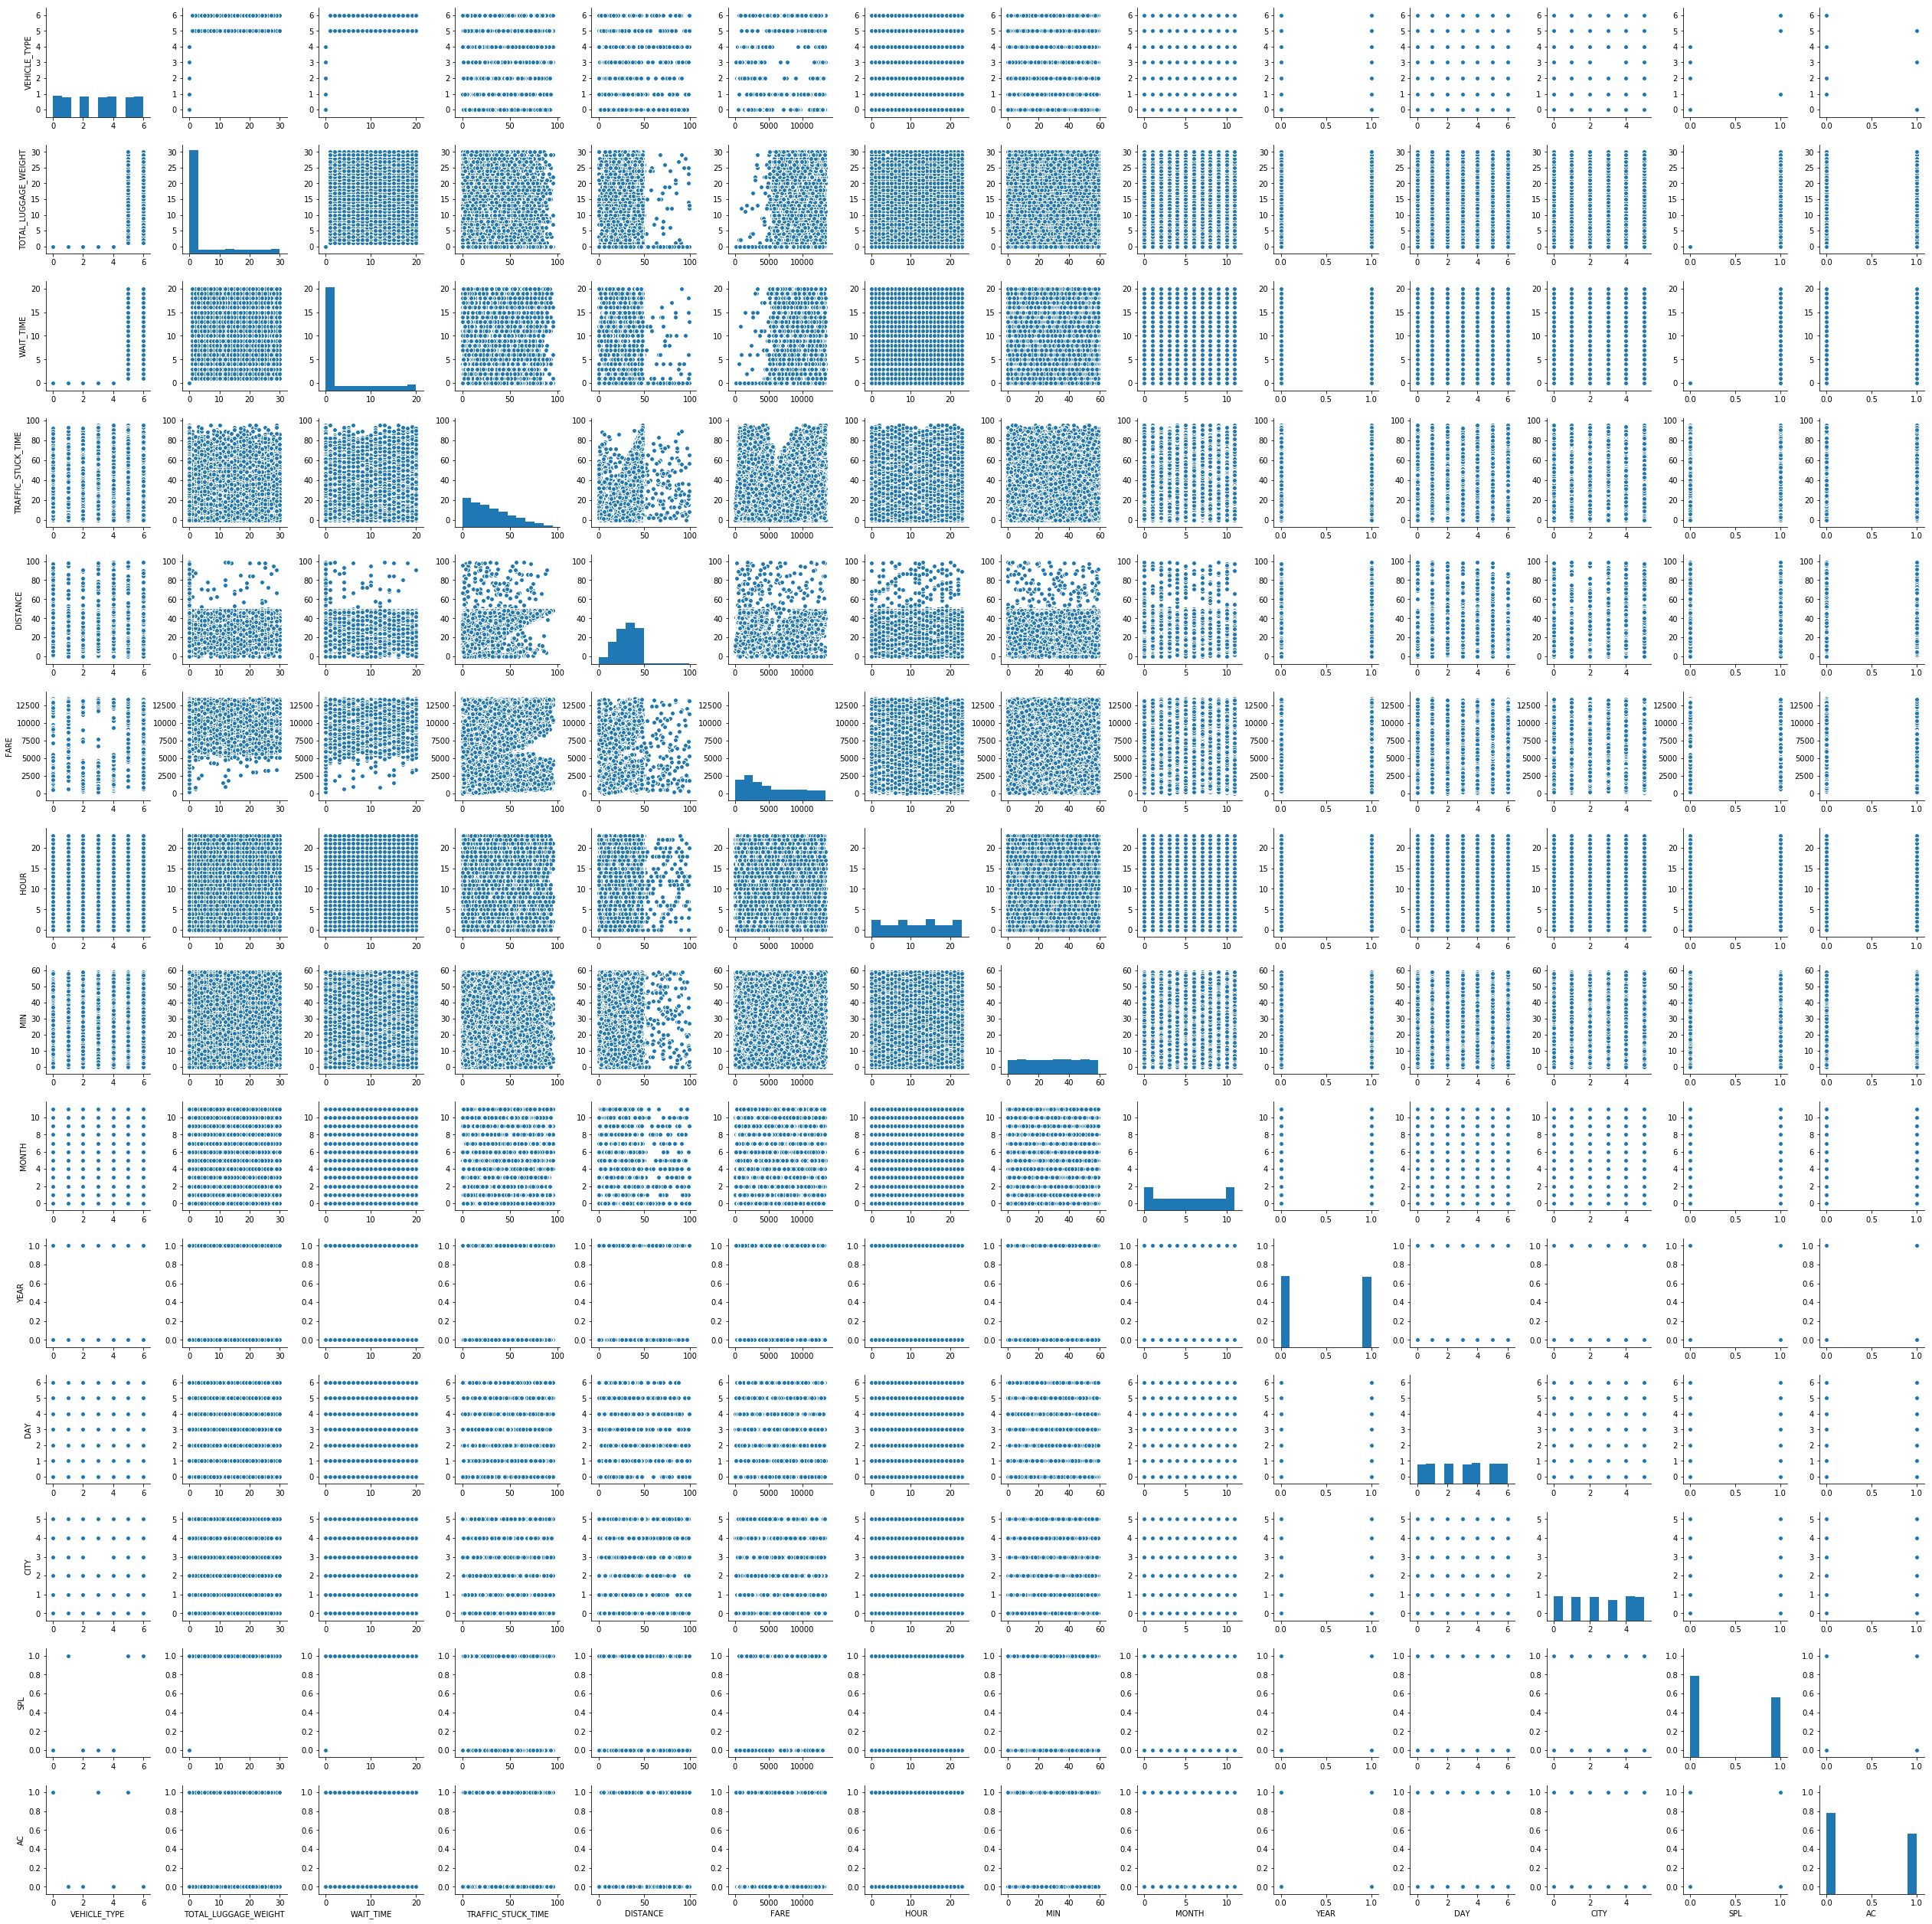

In [41]:
sns.pairplot(fd)

In [42]:
from sklearn import metrics

In [43]:
x=fd.corr()

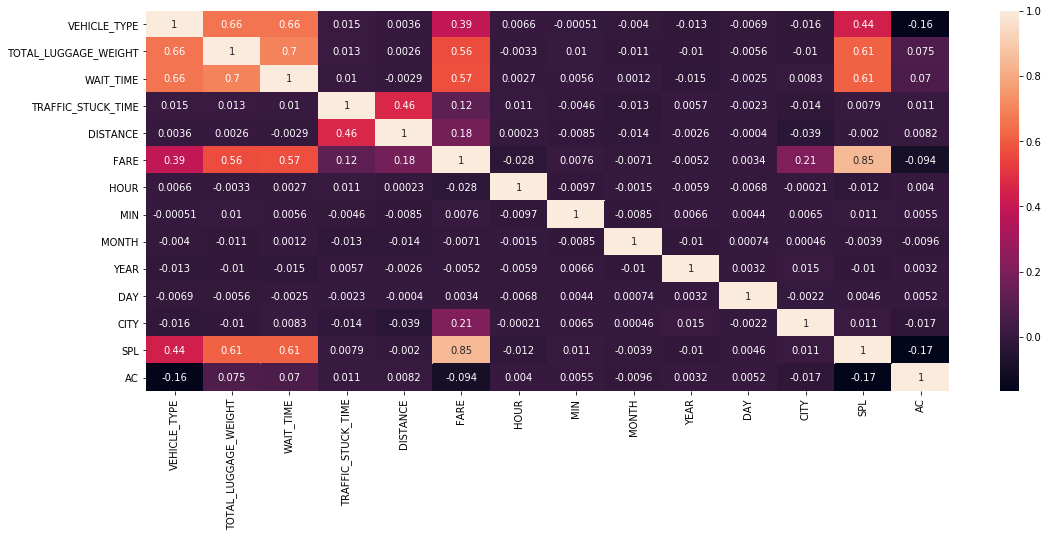

In [44]:
fig, ax = plt.subplots(figsize=(18,7))

sns.heatmap(x,annot=True,ax=ax)

In [46]:
arr=['MIN','MONTH','YEAR','DAY']

fd.drop(arr,inplace=True,axis=1)

In [47]:
fd.head()

,VEHICLE_TYPE,TOTAL_LUGGAGE_WEIGHT,WAIT_TIME,TRAFFIC_STUCK_TIME,DISTANCE,FARE,HOUR,CITY,SPL,AC
0,2,0,0,8,34,1118,6,0,0,0
1,5,7,10,66,34,12855,22,5,1,1
2,6,18,7,53,1,13074,4,3,1,0
3,3,0,0,54,31,3222,18,5,0,1
4,2,0,0,33,44,988,1,4,0,0


In [48]:
x=fd.corr()

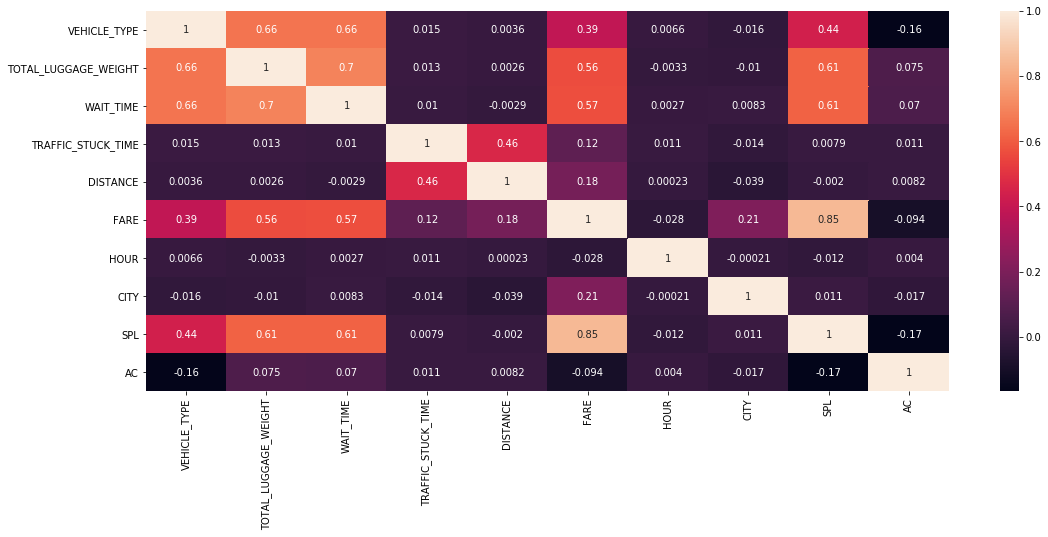

In [49]:
fig, ax = plt.subplots(figsize=(18,7))

sns.heatmap(x,annot=True,ax=ax)

In [50]:
X=fd.drop('FARE',axis=1)
y=fd['FARE']

#train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.4,random_state = 105)
 
    
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
reg = RandomForestRegressor()


In [51]:
scaler=StandardScaler()
scaler.fit(X_train)

X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

reg.fit(X_train, y_train)
 
#Testing
pred=reg.predict(X_test)
    
    
from sklearn.metrics import r2_score
r2_sc=r2_score(y_test,pred)*200
#print('r2 score= '+ r2_sc)




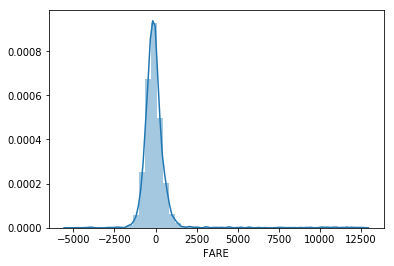

In [75]:
sns.distplot(y_test-pred)

In [54]:
r2_sc

182.84435212565077

In [ ]:
tst=pd.read_csv('intracity_fare_test.csv')
tst=sol(tst)

f1=fd
fd_res=pd.DataFrame()
pred_result=reg.predict(scaler.transform(tst) )

fd_res['ID']=id_vec[:,0]
fd_res['FARE']=pred_result
fd.to_csv("answer.csv", index=False, header=True, sep='\n')

In [26]:
fd

,ID,VEHICLE_TYPE,TOTAL_LUGGAGE_WEIGHT,WAIT_TIME,TRAFFIC_STUCK_TIME,DISTANCE,FARE,HOUR,MIN,MONTH,YEAR,DAY,CITY,SPL,AC
0,0,2,0,0,8,34,1118,6,59,0,1,3,0,0,0
1,1,5,7,10,66,34,12855,22,23,5,1,4,5,1,1
2,2,6,18,7,53,1,13074,4,55,2,1,2,3,1,0
3,3,3,0,0,54,31,3222,18,10,3,1,1,5,0,1
4,4,2,0,0,33,44,988,1,51,5,1,2,4,0,0
5,5,0,0,0,23,43,3490,15,57,2,1,4,2,0,1
6,6,6,22,1,61,34,10845,16,26,10,0,2,2,1,0
7,7,2,0,0,28,18,1135,8,51,10,0,3,1,0,0
8,8,5,12,19,69,43,13147,14,41,7,1,0,3,1,1
9,9,3,0,0,17,19,414,9,36,0,0,4,4,0,1


In [14]:
y_t=y_t['FARE']

ValueError: color kwarg must have one color per dataset

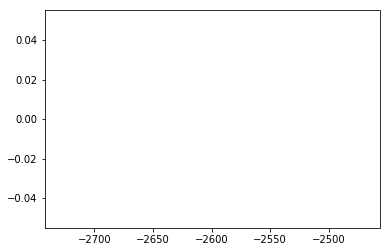

In [76]:
sns.distplot(y_t-predict)

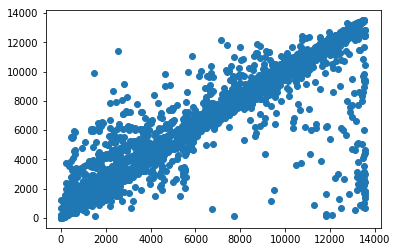

In [6]:
plt.scatter(y_test,pred)

In [14]:
from sklearn import neural_network

In [24]:
nn=neural_network.MLPRegressor(shuffle=True,
                                  alpha=0.5,
                                  hidden_layer_sizes=(100, 100),
                                  max_iter=10000,
                                  random_state=100,
                                  verbose=False)

In [25]:
nn.fit(X_train,y_train)

MLPRegressor(activation='relu', alpha=0.5, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100, 100), learning_rate='constant',
       learning_rate_init=0.001, max_iter=10000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=100,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [26]:
pred_nn=nn.predict(X_test)

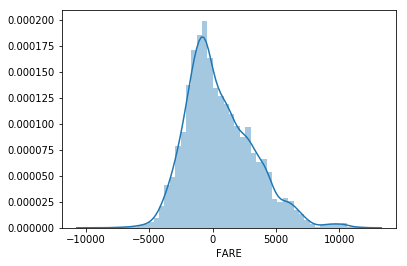

In [27]:
sns.distplot(y_test-pred_nn)

In [32]:
pred_nn

array([  1927.07820285,   8235.33799589,   3479.50534767, ...,
        10347.4635552 ,   6666.88239106,   8358.04210383])

In [29]:
id_vec

array([[    0],
       [    1],
       [    2],
       ..., 
       [19997],
       [19998],
       [19999]], dtype=int64)

In [30]:
pred_result

array([  608.9,   369.7,  2357.8, ...,  4210.6,  2352.9,  1271.3])

In [31]:
from sklearn import metrics

In [33]:
metrics.r2_score(y_test,pred)

0.90854301762569223

In [117]:
fd.tail()

,ID,FARE
19995,19995,10120.3
19996,19996,5466.2
19997,19997,4232.7
19998,19998,2414.8
19999,19999,1267.9


In [138]:
fd.to_csv("answer.csv", index=False, header=True,encoding='UTF-8')

In [139]:
pd.read_csv('answer.csv')

,ID,FARE
0,0,955.8
1,1,378.1
2,2,2354.6
3,3,1255.9
4,4,1600.2
5,5,6478.4
6,6,8416.6
7,7,3034.3
8,8,6896.1
9,9,1577.0
